# YOLOv8 inference on static Yoga pose image dataset

In [1]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt


# Load a pretrained YOLO model (recommended for training)
model = YOLO('yolov8n-pose.pt')

In [2]:
yolo_img_path = 'Yoga poses.v4i.yolov8/test/images/test1.jpg'

# Perform object detection on an image using the model
results = model(yolo_img_path)

print("oi)")


image 1/1 /home/rtu/Documents/Metrics_mp/Yoga poses.v4i.yolov8/test/images/test1.jpg: 640x640 1 person, 4.4ms
Speed: 2.5ms preprocess, 4.4ms inference, 716.9ms postprocess per image at shape (1, 3, 640, 640)


[(267, 206), (277, 200), (0, 0), (306, 215), (0, 0), (316, 245), (303, 241), (308, 231), (312, 228), (305, 152), (284, 151), (306, 379), (266, 376), (397, 426), (172, 413), (542, 500), (174, 485)]


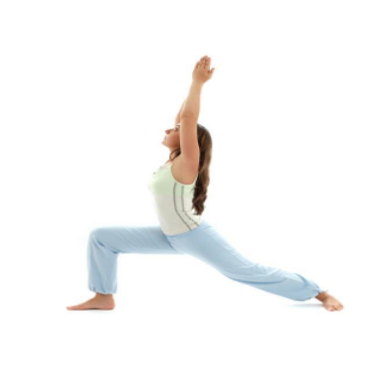

"\n\n# Extract the pose landmarks from the results\nfor result in results:\n    if result.keypoints is not None:\n        # Access keypoints tensor directly\n        keypoints = result.keypoints[0]  # Assume the first detection (or iterate over multiple detections)\n\n        # Filter for the 13 specific keypoints\n        selected_keypoints = keypoints[selected_indices]\n\n        # Load and display the image\n        image = cv2.imread(yolo_img_path)\n        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)\n\n        # Plot the image and the selected keypoints\n        plt.imshow(image)\n\n        for kp in selected_keypoints:\n            x, y, confidence = kp[:3]  # Assumes that each kp has three values: x, y, confidence\n            if confidence > 0.5:  # Filter by confidence if needed\n                \n\n        plt.axis('off')\n        plt.show()\n\n"

In [26]:
# Define the indices for the 13 keypoints we need
# Using MediaPipe indices: 
# 0: Nose, 5: Left Shoulder, 6: Right Shoulder, 11: Left Hip, 12: Right Hip, 
# 13: Left Knee, 14: Right Knee, 15: Left Ankle, 16: Right Ankle, 7: Left Elbow, 8: Right Elbow,
# 9: Left Wrist, 10: Right Wrist
selected_indices = [0, 5, 6, 11, 12, 13, 14, 15, 16, 7, 8, 9, 10]

denormalized_kps = []

# Process results
iter = 0
for r in results:
    keypoints = r.keypoints.xyn.cpu().numpy()  # Normalized keypoints (x, y, conf)
    
    for kp in keypoints[0]:
            x, y = int(kp[0] * 640), int(kp[1] * 640) # denormalize , if needed
            #print(x,y)
            denormalized_kps.append((x,y))


selected_keypoints = []

#  WIP: Filter for the 13 specific keypoints
for kp in denormalized_kps:
    if(kp == selected_indices):
        selected_keypoints.append(denormalized_kps) 

print(denormalized_kps)
    
    
for r in results:    
    # Load and display the image
    image = cv2.imread(yolo_img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image and the selected keypoints
    plt.imshow(image)

    for kp in selected_keypoints:
        cv2.circle(image, (int(x), int(y)), 5, (0, 255, 0), -1)

    plt.axis('off')
    plt.show()


"""

# Extract the pose landmarks from the results
for result in results:
    if result.keypoints is not None:
        # Access keypoints tensor directly
        keypoints = result.keypoints[0]  # Assume the first detection (or iterate over multiple detections)

        # Filter for the 13 specific keypoints
        selected_keypoints = keypoints[selected_indices]

        # Load and display the image
        image = cv2.imread(yolo_img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Plot the image and the selected keypoints
        plt.imshow(image)

        for kp in selected_keypoints:
            x, y, confidence = kp[:3]  # Assumes that each kp has three values: x, y, confidence
            if confidence > 0.5:  # Filter by confidence if needed
                

        plt.axis('off')
        plt.show()

"""